In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [128]:
# to load training dataset for google shre price
training_set = pd.read_csv("/content/drive/MyDrive/Time_Series/Google_Stock_Price_Train.csv")

In [129]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [130]:
training_set.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [131]:
# To change the data type of date column from object to date
training_set['Date']=pd.to_datetime(training_set['Date'])

In [132]:
training_set.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object

In [133]:
training_set['Date'].min(),training_set['Date'].max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2016-12-30 00:00:00'))

In [134]:
training_set.shape #how manu rows and columns

(1258, 6)

In [135]:
x=training_set.iloc[:,1:2] #input : open
#x=training_set.loc[:],['Open'] 

In [136]:
x.shape

(1258, 1)

In [137]:
x.ndim

2

In [138]:
x

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [139]:
# Apply scaling : 1 : MinMaxScaler(Normalised)
#                  2 : StandardScaler("Standarsised")

#minmaxscaler
#(x-x.min()/(x.max()-x.min()))

#Apply feature engineering means apply minmaxscaler(stock market)

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [140]:
x=mms.fit_transform(x) # After scaling , it will change x in numpy array

In [141]:
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [142]:
type(x)

numpy.ndarray

In [143]:
# to find the number of records
len(x)

1258

In [144]:
# Now select input and output from x input
x_train=x[0:1257] # start= 0 stop=1257-1 1256
y_train=x[1:1258] # start =1 STOP=1258-1 1257

In [145]:
len(x_train),len(y_train)

(1257, 1257)

In [146]:
# Next step : give 3D data to machine
x_train.ndim,y_train.ndim

(2, 2)

In [147]:
# First dimension : no.of records/rows
# Second Dimension : no. of columns 
# Third Dimension : time Stamp
# 2023-->2022
# 12-04-2023--->11-04-2023
#t+1--->t--->t-1
# Time Stamp : t+1-t =1 After one day from current day

#Time Stamp : t+4-t=4 After 4 days from current day

In [148]:
# WEe convert input x_train from 2D to 3D
x_train=np.reshape(x_train,(1257,1,1)) #(no. of rows,no. of columns , time stamp)

In [149]:
x_train.ndim

3

In [150]:
x_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [151]:
# neural network : RNN-->LSTM
# long short Term MemoryErrorTime Series : Sequential
# t+1-->t-->t-1-->t-2D


# frame work-->tensorflow-->keras-->models class-->Sequential

In [152]:
# part 2 : building neural network(LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#LSTM L<ong short term memoryt : to manage internal memory
# its stores previous output

In [153]:
# we hacve rgression problem means we have to poredict stocks price and stocks price is continous numeric value means it is regression problem, means we take activation function 
#on output layer : linear (y_pred = w*x+bias)

In [154]:
# to create a sequential class
model = Sequential()

In [155]:
# To add the layers in the model
model.add(LSTM(units = 4,activation = 'sigmoid',input_shape=(None,1)))
# None means to take automatic no. of rows from given dataset
# 1. means no. of columns
# units means inbuilt parameter means passing the no. of neurons

# To add output layer 
model.add(Dense(units=1,activation='linear'))

In [156]:
#compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
#optrimizer : strochastic gradient decent(slow process)

In [157]:
#create a procedure for early stopping
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor="val_loss",#val_loss means validation loss means testing loss
min_delta=0.00001, #value of lambda
patience=20,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False)

In [158]:
# adam : momentum + direction
# adagrade + momentum
# direction + momentum

In [159]:
# train the model with training data , use fit() inbuilt method od sequential class
train_model = model.fit(x_train,y_train,epochs=100,callbacks=es,batch_size = 20)

Epoch 1/100
43/63 [===================>..........] - ETA: 0s - loss: 0.0806

63/63 [==============================] - 2s 3ms/step - loss: 0.0804
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.0772

63/63 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 3/100
43/63 [===================>..........] - ETA: 0s - loss: 0.0777

63/63 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 4/100
52/63 [=======================>......] - ETA: 0s - loss: 0.0720

63/63 [==============================] - 0s 3ms/step - loss: 0.0715
Epoch 5/100
44/63 [===================>..........] - ETA: 0s - loss: 0.0718

63/63 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 6/100
62/63 [============================>.] - ETA: 0s - loss: 0.0656

63/63 [==============================] - 0s 3ms/step - loss: 0.0658
Epoch 7/100
60/63 [===========================>..] - ETA: 0s - loss: 0.0632

63/63 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 8/100
48/63 [=====================>........] - ETA: 0s - loss: 0.0591

63/63 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 9/100
61/63 [============================>.] - ETA: 0s - loss: 0.0568

63/63 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 10/100
62/63 [============================>.] - ETA: 0s - loss: 0.0528

63/63 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 11/100
43/63 [===================>..........] - ETA: 0s - loss: 0.0505

63/63 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 12/100
59/63 [===========================>..] - ETA: 0s - loss: 0.0466

63/63 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 13/100
63/63 [==============================] - ETA: 0s - loss: 0.0423

63/63 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 14/100
59/63 [===========================>..] - ETA: 0s - loss: 0.0391

63/63 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 15/100
47/63 [=====================>........] - ETA: 0s - loss: 0.0352

63/63 [==============================] - 0s 2ms/step - loss: 0.0349
Epoch 16/100
44/63 [===================>..........] - ETA: 0s - loss: 0.0310

63/63 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 17/100
46/63 [====================>.........] - ETA: 0s - loss: 0.0276

63/63 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 18/100
44/63 [===================>..........] - ETA: 0s - loss: 0.0234

63/63 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 19/100
57/63 [==========================>...] - ETA: 0s - loss: 0.0206

63/63 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 20/100
58/63 [==========================>...] - ETA: 0s - loss: 0.0174

63/63 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 21/100
50/63 [======================>.......] - ETA: 0s - loss: 0.0145

63/63 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 22/100
42/63 [===================>..........] - ETA: 0s - loss: 0.0121

63/63 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 23/100
53/63 [========================>.....] - ETA: 0s - loss: 0.0098

63/63 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 24/100
59/63 [===========================>..] - ETA: 0s - loss: 0.0075

63/63 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 25/100
59/63 [===========================>..] - ETA: 0s - loss: 0.0059

63/63 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 26/100
61/63 [============================>.] - ETA: 0s - loss: 0.0045

63/63 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 27/100
63/63 [==============================] - ETA: 0s - loss: 0.0034

63/63 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 28/100
55/63 [=========================>....] - ETA: 0s - loss: 0.0025

63/63 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 29/100
49/63 [======================>.......] - ETA: 0s - loss: 0.0019

63/63 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 30/100
58/63 [==========================>...] - ETA: 0s - loss: 0.0014

63/63 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 31/100
55/63 [=========================>....] - ETA: 0s - loss: 0.0010

63/63 [==============================] - 0s 4ms/step - loss: 9.9898e-04
Epoch 32/100
63/63 [==============================] - ETA: 0s - loss: 7.5518e-04

63/63 [==============================] - 0s 4ms/step - loss: 7.5518e-04
Epoch 33/100
57/63 [==========================>...] - ETA: 0s - loss: 6.0115e-04

63/63 [==============================] - 0s 4ms/step - loss: 5.8375e-04
Epoch 34/100
62/63 [============================>.] - ETA: 0s - loss: 4.6671e-04

63/63 [==============================] - 0s 4ms/step - loss: 4.6938e-04
Epoch 35/100
52/63 [=======================>......] - ETA: 0s - loss: 4.2249e-04

63/63 [==============================] - 0s 4ms/step - loss: 3.9570e-04
Epoch 36/100
59/63 [===========================>..] - ETA: 0s - loss: 3.3577e-04

63/63 [==============================] - 0s 4ms/step - loss: 3.4603e-04
Epoch 37/100
57/63 [==========================>...] - ETA: 0s - loss: 3.2299e-04

63/63 [==============================] - 0s 4ms/step - loss: 3.1663e-04
Epoch 38/100
55/63 [=========================>....] - ETA: 0s - loss: 3.0622e-04

63/63 [==============================] - 0s 4ms/step - loss: 3.0045e-04
Epoch 39/100
52/63 [=======================>......] - ETA: 0s - loss: 2.7961e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8871e-04
Epoch 40/100
52/63 [=======================>......] - ETA: 0s - loss: 2.9831e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.8318e-04
Epoch 41/100
55/63 [=========================>....] - ETA: 0s - loss: 2.5779e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.7871e-04
Epoch 42/100
60/63 [===========================>..] - ETA: 0s - loss: 2.8004e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.8053e-04
Epoch 43/100
59/63 [===========================>..] - ETA: 0s - loss: 2.7872e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7516e-04
Epoch 44/100
58/63 [==========================>...] - ETA: 0s - loss: 2.7535e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7438e-04
Epoch 45/100
45/63 [====================>.........] - ETA: 0s - loss: 2.7503e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.7435e-04
Epoch 46/100
54/63 [========================>.....] - ETA: 0s - loss: 2.7861e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7409e-04
Epoch 47/100
45/63 [====================>.........] - ETA: 0s - loss: 2.7512e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.7288e-04
Epoch 48/100
43/63 [===================>..........] - ETA: 0s - loss: 2.4896e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.7243e-04
Epoch 49/100
62/63 [============================>.] - ETA: 0s - loss: 2.7367e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7194e-04
Epoch 50/100
47/63 [=====================>........] - ETA: 0s - loss: 2.5902e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.7115e-04
Epoch 51/100
44/63 [===================>..........] - ETA: 0s - loss: 2.7466e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.7063e-04
Epoch 52/100
54/63 [========================>.....] - ETA: 0s - loss: 2.6147e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7018e-04
Epoch 53/100
60/63 [===========================>..] - ETA: 0s - loss: 2.5249e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7093e-04
Epoch 54/100
43/63 [===================>..........] - ETA: 0s - loss: 2.9848e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.7133e-04
Epoch 55/100
61/63 [============================>.] - ETA: 0s - loss: 2.6907e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6928e-04
Epoch 56/100
63/63 [==============================] - ETA: 0s - loss: 2.6937e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6937e-04
Epoch 57/100
60/63 [===========================>..] - ETA: 0s - loss: 2.5709e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6862e-04
Epoch 58/100
61/63 [============================>.] - ETA: 0s - loss: 2.6948e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6776e-04
Epoch 59/100
63/63 [==============================] - ETA: 0s - loss: 2.6720e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6720e-04
Epoch 60/100
61/63 [============================>.] - ETA: 0s - loss: 2.7237e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6816e-04
Epoch 61/100
43/63 [===================>..........] - ETA: 0s - loss: 2.4699e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6779e-04
Epoch 62/100
41/63 [==================>...........] - ETA: 0s - loss: 2.8617e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6725e-04
Epoch 63/100
58/63 [==========================>...] - ETA: 0s - loss: 2.7353e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6668e-04
Epoch 64/100
55/63 [=========================>....] - ETA: 0s - loss: 2.6527e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6760e-04
Epoch 65/100
45/63 [====================>.........] - ETA: 0s - loss: 2.6282e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6497e-04
Epoch 66/100
58/63 [==========================>...] - ETA: 0s - loss: 2.5727e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6615e-04
Epoch 67/100
63/63 [==============================] - ETA: 0s - loss: 2.6633e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6633e-04
Epoch 68/100
57/63 [==========================>...] - ETA: 0s - loss: 2.5183e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6505e-04
Epoch 69/100
57/63 [==========================>...] - ETA: 0s - loss: 2.6600e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6572e-04
Epoch 70/100
43/63 [===================>..........] - ETA: 0s - loss: 2.8485e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6402e-04
Epoch 71/100
62/63 [============================>.] - ETA: 0s - loss: 2.6424e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6339e-04
Epoch 72/100
63/63 [==============================] - ETA: 0s - loss: 2.6479e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6479e-04
Epoch 73/100
56/63 [=========================>....] - ETA: 0s - loss: 2.5753e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6524e-04
Epoch 74/100
51/63 [=======================>......] - ETA: 0s - loss: 2.8665e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6552e-04
Epoch 75/100
54/63 [========================>.....] - ETA: 0s - loss: 2.6875e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6149e-04
Epoch 76/100
63/63 [==============================] - ETA: 0s - loss: 2.6310e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6310e-04
Epoch 77/100
61/63 [============================>.] - ETA: 0s - loss: 2.6581e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6230e-04
Epoch 78/100
62/63 [============================>.] - ETA: 0s - loss: 2.6175e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6352e-04
Epoch 79/100
54/63 [========================>.....] - ETA: 0s - loss: 2.4694e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6277e-04
Epoch 80/100
61/63 [============================>.] - ETA: 0s - loss: 2.6658e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6609e-04
Epoch 81/100
62/63 [============================>.] - ETA: 0s - loss: 2.5620e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6236e-04
Epoch 82/100
41/63 [==================>...........] - ETA: 0s - loss: 2.5570e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6135e-04
Epoch 83/100
62/63 [============================>.] - ETA: 0s - loss: 2.5636e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6174e-04
Epoch 84/100
63/63 [==============================] - ETA: 0s - loss: 2.6210e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6210e-04
Epoch 85/100
62/63 [============================>.] - ETA: 0s - loss: 2.6117e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6125e-04
Epoch 86/100
46/63 [====================>.........] - ETA: 0s - loss: 2.7101e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5975e-04
Epoch 87/100
63/63 [==============================] - ETA: 0s - loss: 2.6617e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6617e-04
Epoch 88/100
63/63 [==============================] - ETA: 0s - loss: 2.6226e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6226e-04
Epoch 89/100
60/63 [===========================>..] - ETA: 0s - loss: 2.6671e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6300e-04
Epoch 90/100
55/63 [=========================>....] - ETA: 0s - loss: 2.5927e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5845e-04
Epoch 91/100
46/63 [====================>.........] - ETA: 0s - loss: 2.4996e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.6006e-04
Epoch 92/100
51/63 [=======================>......] - ETA: 0s - loss: 2.5515e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5922e-04
Epoch 93/100
60/63 [===========================>..] - ETA: 0s - loss: 2.4622e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5972e-04
Epoch 94/100
43/63 [===================>..........] - ETA: 0s - loss: 2.4173e-04

63/63 [==============================] - 0s 2ms/step - loss: 2.5918e-04
Epoch 95/100
42/63 [===================>..........] - ETA: 0s - loss: 2.8737e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.5866e-04
Epoch 96/100
42/63 [===================>..........] - ETA: 0s - loss: 2.9818e-04

63/63 [==============================] - 0s 3ms/step - loss: 2.6203e-04
Epoch 97/100
58/63 [==========================>...] - ETA: 0s - loss: 2.5870e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.6213e-04
Epoch 98/100
52/63 [=======================>......] - ETA: 0s - loss: 2.6845e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5840e-04
Epoch 99/100
54/63 [========================>.....] - ETA: 0s - loss: 2.3856e-04

63/63 [==============================] - 0s 5ms/step - loss: 2.5986e-04
Epoch 100/100
53/63 [========================>.....] - ETA: 0s - loss: 2.5374e-04

63/63 [==============================] - 0s 4ms/step - loss: 2.5815e-04


In [160]:
#part 3 : test the model : use inbuilt method predict() on given testing dataset given bellow
df_test = pd.read_csv("/content/drive/MyDrive/Time_Series/Google_Stock_Price_Test.csv")

In [161]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [162]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [163]:
# To change the data type of date column from object to date
df_test['Date']=pd.to_datetime(df_test['Date'])


In [164]:
df_test.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [165]:
df_test.shape

(20, 6)

In [166]:
x_test=df_test.iloc[:,1:2]
x_test.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [167]:
# applying normalization(minmaxscaler) on x_test
#create object of minmaxscaler
# mms=MinMaxScaler()
x_test = mms.transform(x_test) # changes to numpy array
x_test

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [168]:
x_test.ndim 

2

In [169]:
type(x_test)

numpy.ndarray

In [170]:
#convert testing data into 3D 
x_test=np.reshape(x_test,(20,1,1))

In [171]:
x_test.ndim 

3

In [172]:
x_test

array([[[0.92955205]],

       [[0.94731751]],

       [[0.94307612]],

       [[0.96015329]],

       [[0.98087655]],

       [[0.98359253]],

       [[0.97827219]],

       [[0.98225314]],

       [[0.98288563]],

       [[0.98214153]],

       [[0.979779  ]],

       [[0.97849542]],

       [[0.98182528]],

       [[0.98245777]],

       [[1.01045465]],

       [[1.02407173]],

       [[1.03930724]],

       [[1.03354044]],

       [[0.99624228]],

       [[0.9631297 ]]])

In [173]:
# predict with testing data
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 299ms/step


In [174]:
y_pred

array([[0.91921353],
       [0.93488157],
       [0.9311563 ],
       [0.9460975 ],
       [0.96401656],
       [0.96634746],
       [0.96177757],
       [0.9651985 ],
       [0.96574116],
       [0.9651027 ],
       [0.9630734 ],
       [0.9619695 ],
       [0.9648311 ],
       [0.965374  ],
       [0.9891809 ],
       [1.0006005 ],
       [1.0132521 ],
       [1.008479  ],
       [0.9771501 ],
       [0.9486855 ]], dtype=float32)

In [175]:
# To remove scaling on y_pred , use inverse transform(), inbuilt method which are defined in MinmaxScaler
#create object of minmaxscaler
y_pred=mms.inverse_transform(y_pred)
y_pred

array([[773.2524 ],
       [781.6749 ],
       [779.67236],
       [787.70416],
       [797.33673],
       [798.5897 ],
       [796.1331 ],
       [797.9721 ],
       [798.2638 ],
       [797.9206 ],
       [796.8297 ],
       [796.23627],
       [797.7746 ],
       [798.0664 ],
       [810.8641 ],
       [817.00275],
       [823.8038 ],
       [821.2379 ],
       [804.3968 ],
       [789.09534]], dtype=float32)

In [176]:
x1=df_test.iloc[:,1:2]# input
#Select output from input x1
y_test=x1[1:20] # start :1 end:1258-1=1257z 

In [177]:
y_test.shape,y_pred.shape

((19, 1), (20, 1))

In [178]:
y_pred=y_pred[0:19]

In [179]:
y_test.shape,y_pred.shape

((19, 1), (19, 1))

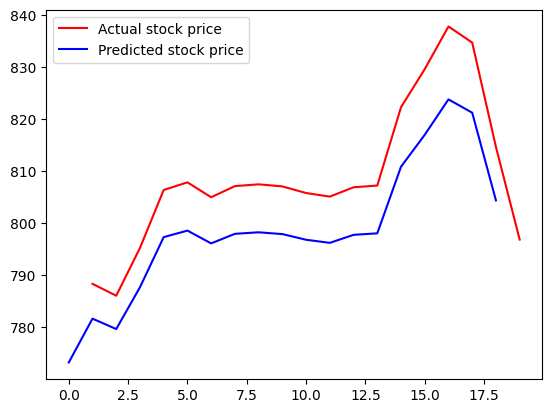

In [180]:
#Visualization
plt.plot(y_test,color="red",label="Actual stock price")
plt.plot(y_pred,color="blue",label="Predicted stock price")
plt.legend()
plt.show()

In [181]:
# Evaluate the model
# find the mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

168.78718152820412


In [182]:
# find the r2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.07813866047811724


In [183]:
# predict the next dat price :
price = float(input("Enter todays price : "))
# here price is scaler variable
#print(type(price))
# First convert the input variable means scaler variable into 2d array
# use inbuilt method array() of numpy
price = np.array([[price]])#  [[]] --2d array
# print(price.ndim)

#Apply minmaxscaler on input variable price
price1=mms.transform(price)
# print(price1)

#converts input price1 into 3d array
price1 = price1.reshape(-1,1,1) # None/-1  means atomatic accept all inputs 
# 1 means no.of columns and 1 time stamp means h=just next day
# print(price1.ndim)

# prediction
y_pred=model.predict(price1)
# print(y_pred)
# remove scalling from y_pred , use inbuilt method inverse_transform() of Minmaxscaler
y_pred = mms.inverse_transform(y_pred)
print("opening price of next day : ",y_pred)

Enter todays price : 100
1/1 [==============================] - 0s 26ms/step
opening price of next day :  [[134.1236]]


In [184]:
# predict the next n days price :
price = float(input("Enter todays price : "))
# here price is scaler variable
#print(type(price))
# First convert the input variable means scaler variable into 2d array
# use inbuilt method array() of numpy
price = np.array([[price]])#  [[]] --2d array
#print(price.ndim)

#Apply minmaxscaler on input variable price
#price1=mms.transform(price)
# print(price1)

#converts input price1 into 3d array
#price1 = price1.reshape(-1,1,1) # None/-1  means atomatic accept all inputs 
# 1 means no.of columns and 1 time stamp means h=just next day
# print(price1.ndim)5

# prediction
n=int(input("How many days : "))
for i in range (n):
  #Apply minmaxscaler on input variable price
  price1=mms.transform(price)
  #converts input price1 into 3d array
  price1 = price1.reshape(-1,1,1)
  y_pred=model.predict(price1)
  # remove scalling from y_pred , use inbuilt method inverse_transform() of Minmaxscaler
  y_pred = mms.inverse_transform(y_pred)
  print(f"opening price of {i+1} days : {y_pred}")
  price=y_pred
  
  

Enter todays price : 100
How many days : 5
1/1 [==============================] - 0s 25ms/step
opening price of 1 days : [[134.1236]]
1/1 [==============================] - 0s 24ms/step
opening price of 2 days : [[159.32913]]
1/1 [==============================] - 0s 25ms/step
opening price of 3 days : [[178.80226]]
1/1 [==============================] - 0s 28ms/step
opening price of 4 days : [[194.33754]]
1/1 [==============================] - 0s 29ms/step
opening price of 5 days : [[207.03322]]


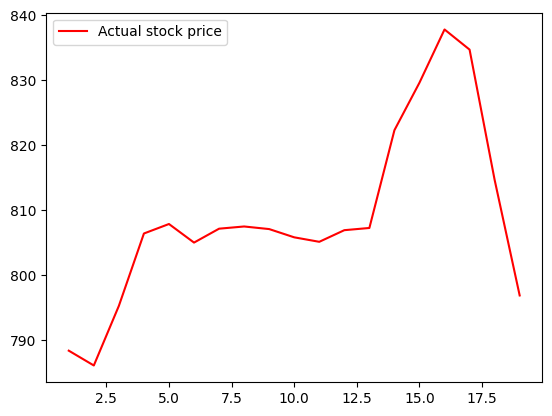

In [185]:
#Visualization
plt.plot(y_test,color="red",label="Actual stock price")
plt.legend()
plt.show()